<h4> Add Libraries and importing diabeties datasets

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pandas as pd
import numpy as np

<h4>loading dataset

In [62]:
wine = load_wine()
type(wine)

sklearn.utils.Bunch

<h4> <u>Learn about Dataset:</u>
<p>
There are 13 attributes and all of them are numeric <br>
Prediction variable is class and it is a categorical variable of values class0,class1, class3<br>
class_0 (59), class_1 (71), class_2 (48)<br>
There are no missing values<br>
</p>


In [58]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [59]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

<h4> 
creating DataFrame<br>
Adding columns names to the dataframe

In [63]:
df=pd.DataFrame(wine.data)
df.columns=wine.feature_names
df['target'] = wine['target']

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [38]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

<h4> Encoding Ordinal categorical variable

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.target=le.fit_transform(dfle.target)
dfle.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [98]:
dfle['target'].unique()

array([0, 1, 2], dtype=int64)

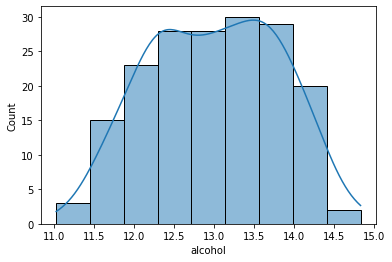

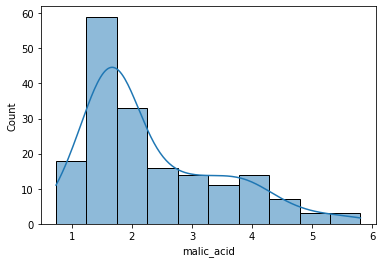

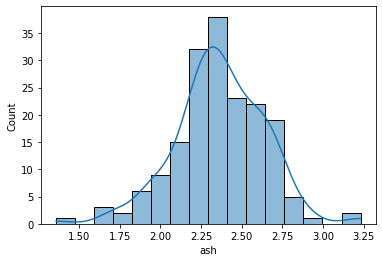

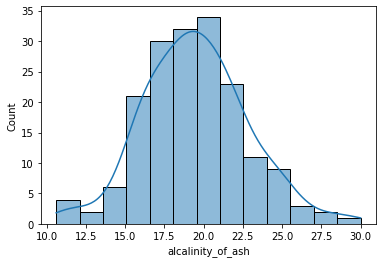

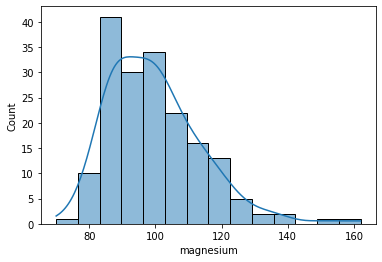

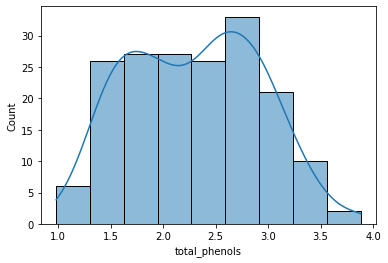

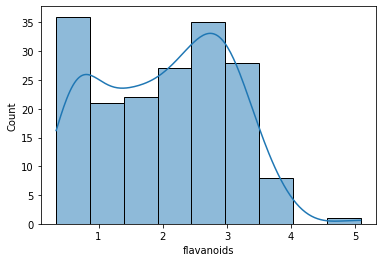

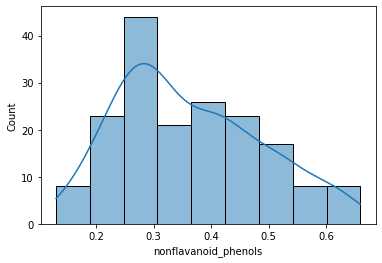

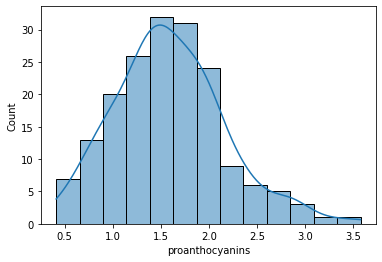

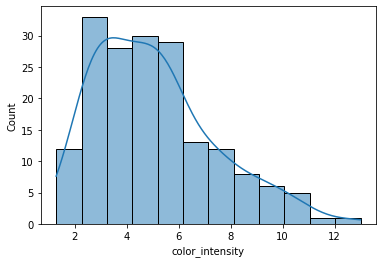

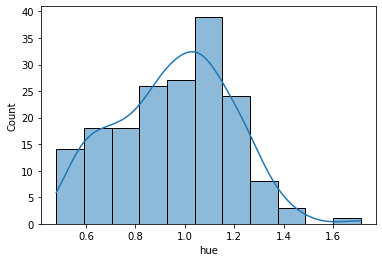

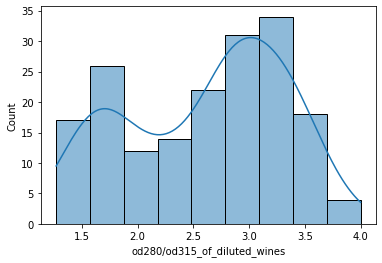

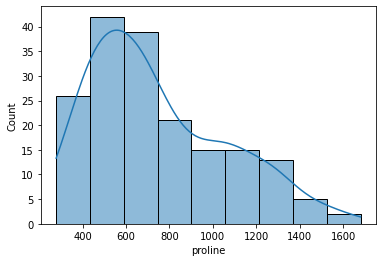

<Figure size 432x288 with 0 Axes>

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.histplot(df[col],kde=True)
    
    plt.figure()

<h4> The columns are not normalised. So we will perform scaling for all columns except for target variable

In [72]:
from sklearn.preprocessing import RobustScaler
def scaling(df):
    trans= RobustScaler()
    data=trans.fit_transform(df.iloc[:,:-1])
    df_stand= pd.DataFrame(data,columns=df.iloc[:,:-1].columns)
    #print(df_stand.head())
    return(df_stand)

In [77]:
dfle_norm=scaling(dfle)
dfle_norm['target']=dfle['target']

In [78]:
dfle_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050,0
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090,0
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728,0
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603,0
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935,0


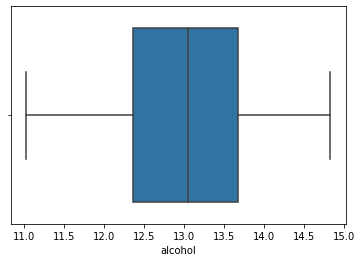

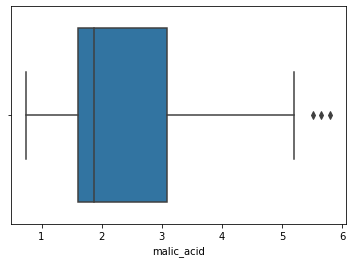

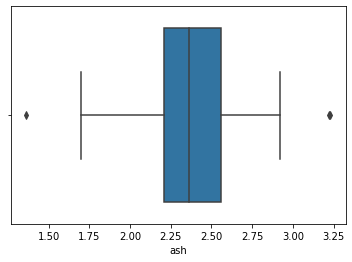

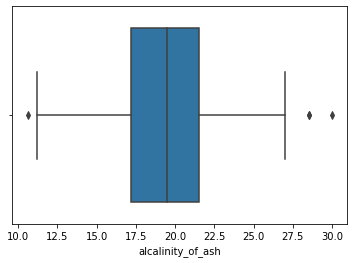

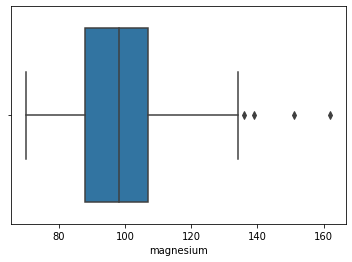

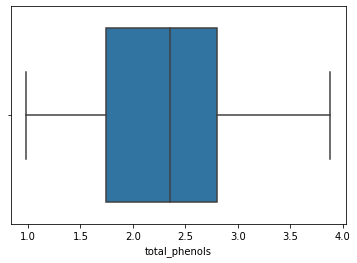

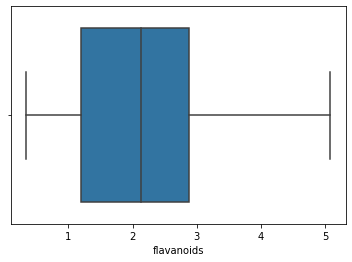

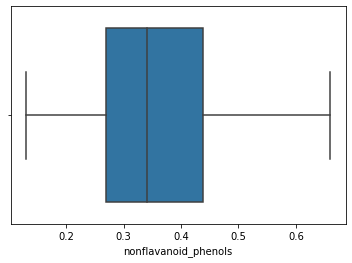

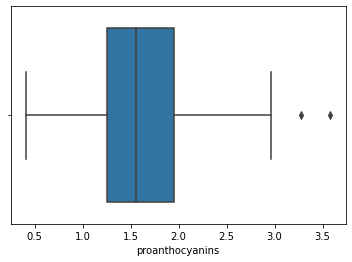

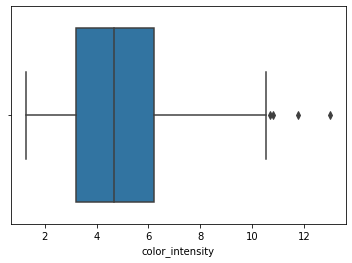

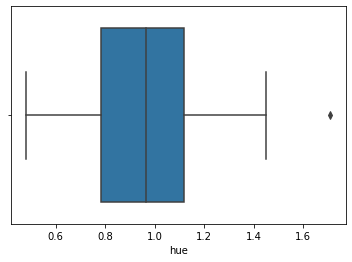

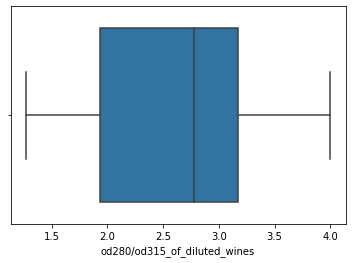

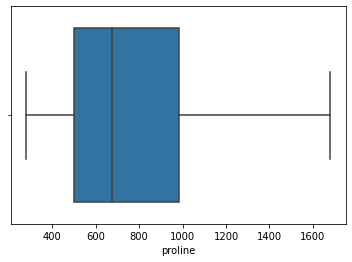

<Figure size 432x288 with 0 Axes>

In [79]:
for col in df.columns[:-1]:
    sns.boxplot(data=dfle,x=col)
    plt.figure()

<h4> There are not much outliers, so no treatment required

In [99]:
def logsitic_reg(df):
    regr_model=LogisticRegression()
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)

    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    
    
    print('accuracy:',acc)
    print(cm)
    print(report)  
    

In [93]:
logsitic_reg(dfle)

features Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (178, 14) (142, 13) (36, 13) (142, 1) (36, 1)
accuracy: 0.9444444444444444
[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0      1.000     0.923     0.960        13
           1      0.929     0.929     0.929        14
           2      0.900     1.000     0.947         9

    accuracy                          0.944        36
   macro avg      0.943     0.951     0.945        36
weighted avg      0.947     0.944     0.945        36



C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1> Accuracy is 94.4%

In [92]:
logsitic_reg(dfle_norm)

features Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (178, 14) (142, 13) (36, 13) (142, 1) (36, 1)
accuracy: 1.0
[[13  0  0]
 [ 0 14  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000         9

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36



C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<h1> Accuracy is imporved to 100% by normalising data